In [9]:
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
# from statsmodels.regression.linear_model import OLS
# from statsmodels.base.elastic_net import *

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
import torch

from catboost import CatBoostClassifier, Pool

from collections import Counter

In [10]:
%matplotlib inline


In [11]:
RPPA = pd.read_csv("CCLE_RPPA_20181003.csv")

In [12]:
RPPA

,Unnamed: 0,14-3-3_beta,14-3-3_epsilon_Caution,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,A-Raf_pS299_Caution,...,Tuberin_pT1462,VAV1_Caution,VEGFR2,VHL_Caution,XBP1_Caution,XRCC1_Caution,YAP_Caution,YAP_pS127_Caution,YB-1,YB-1_pS102
0,DMS53_LUNG,-0.104888,0.060414,0.309068,-0.075506,0.230359,0.198304,-0.030541,0.455889,0.090484,...,-0.099433,-0.486715,-1.147858,0.133876,-0.075812,-0.144388,-1.090303,-2.109324,0.178104,0.246541
1,SW1116_LARGE_INTESTINE,0.358504,-0.180291,-0.041237,-0.286629,-0.877406,-1.026948,-0.462761,-0.011197,0.605330,...,-0.109777,0.349330,0.770148,0.984297,-0.168138,-0.004905,0.189294,-0.283593,0.255972,-0.121134
2,NCIH1694_LUNG,0.028738,0.071902,-0.094847,0.285069,1.321551,0.620703,-0.439484,0.195007,0.036221,...,0.154344,-0.478189,-1.185530,1.273013,-0.240413,0.476633,-1.367465,-2.525695,-0.137880,-0.451282
3,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.120039,-0.066802,-0.128007,-0.552081,-0.292428,-1.415935,-0.138858,-0.066122,-0.346564,...,0.040106,5.923830,-3.893832,-2.499188,0.632758,0.025639,-1.189180,-3.056863,0.025997,-0.465205
4,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.268997,-0.060281,-0.137881,-0.398729,-0.095622,-0.533905,0.054245,-0.573022,-0.162968,...,-0.466919,5.475880,-0.561973,-0.500953,-0.261494,0.358679,-0.951686,-3.247388,-0.151424,-0.145426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,UO31_KIDNEY,0.043231,0.093158,0.105461,0.011264,-0.264052,-0.079559,-0.000355,-0.308669,-0.025941,...,-0.109095,0.137608,0.618270,-0.541645,0.263695,-0.092934,0.433857,0.327542,0.108921,-0.197684
895,SF268_CENTRAL_NERVOUS_SYSTEM,-0.034597,0.065964,-0.329024,-0.540973,0.492108,0.137051,-0.003109,-0.276884,-0.390067,...,-0.339392,-0.054790,-0.271650,-1.735560,-0.397684,-0.166362,2.550478,3.225039,0.136907,0.426637
896,SF539_CENTRAL_NERVOUS_SYSTEM,-0.250998,0.420490,-0.334213,-0.156368,-0.219208,-0.187704,0.240884,0.352163,0.052992,...,0.094319,0.346651,-0.367292,-1.851276,0.069242,0.165163,-0.174660,-0.811089,0.067923,0.237027
897,SNB75_CENTRAL_NERVOUS_SYSTEM,-0.139833,0.194831,-0.135708,-0.434248,0.208941,-0.071338,0.145042,-0.457499,0.032008,...,0.159241,-0.140213,0.436948,-1.476417,-0.390487,-0.163100,0.407310,0.390911,-0.034470,0.153921


In [13]:
RPPA_names = pd.read_csv("For_AbGeneMatch_CCLE_RPPA_Ab_info_20181226.csv")

In [14]:
RPPA_names

,Antibody_Name,Target_Genes,Validation_Status,Company,Catalog_Number
0,14-3-3_beta,YWHAB,Validated,Santa Cruz,sc-628
1,14-3-3_epsilon_Caution,YWHAE,Caution,Santa Cruz,sc-23957
2,14-3-3_zeta,YWHAZ,Validated,Santa Cruz,sc-1019
3,4E-BP1,EIF4EBP1,Validated,CST,9452
4,4E-BP1_pS65,EIF4EBP1,Validated,CST,9456
...,...,...,...,...,...
209,XRCC1_Caution,XRCC1,Caution,CST,2735
210,YAP_Caution,YAP1,Caution,Santa Cruz,sc-15407
211,YAP_pS127_Caution,YAP1,Caution,CST,4911
212,YB-1,YBX1,Validated,Novus Biologicals,17250002


In [15]:
len(Counter(RPPA_names["Antibody_Name"]))

214

In [16]:
len(Counter(RPPA_names["Target_Genes"]))

170

In [17]:
cancer_dependency = pd.read_csv("gene_dependency.csv")

In [18]:
cancer_dependency

,Broad_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZUFSP (221302),ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000004,0.002129,0.006783,0.081640,0.010361,0.013691,0.074350,0.000266,0.311710,0.000632,...,0.082184,0.069525,0.033661,0.364498,0.002155,0.001018,0.360633,0.000675,0.002345,0.081261
1,ACH-000005,0.020470,0.002031,0.025115,0.002116,0.079288,0.195879,0.004394,0.116488,0.022644,...,0.078566,0.231807,0.021735,0.429784,0.021305,0.021798,0.058392,0.000282,0.095551,0.023069
2,ACH-000007,0.009631,0.002172,0.011482,0.000798,0.000962,0.000658,0.002410,0.404151,0.010490,...,0.020110,0.494282,0.040051,0.115562,0.000313,0.005896,0.084022,0.002908,0.216080,0.275783
3,ACH-000009,0.005615,0.021932,0.011870,0.007334,0.013617,0.009242,0.017634,0.553438,0.002794,...,0.008935,0.322765,0.145827,0.115705,0.006658,0.014372,0.589922,0.001167,0.042250,0.503824
4,ACH-000011,0.001611,0.002132,0.003998,0.000077,0.007050,0.089795,0.002569,0.284669,0.000986,...,0.001156,0.600427,0.284399,0.409307,0.000036,0.000529,0.041156,0.001610,0.020630,0.098593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,ACH-001736,0.005784,0.008751,0.040765,0.013689,0.072022,0.010826,0.000913,0.595462,0.006802,...,0.011449,0.800808,0.251861,0.458491,0.006435,0.004583,0.020384,0.001379,0.023723,0.479643
554,ACH-001737,0.023140,0.010466,0.053160,0.005453,0.011001,0.251049,0.009890,0.398615,0.006682,...,0.014786,0.145311,0.004201,0.528008,0.118762,0.003912,0.296849,0.005458,0.589855,0.113018
555,ACH-001740,0.006367,0.000118,0.088911,0.000420,0.043671,0.022866,0.034652,0.508391,0.020902,...,0.017157,0.132062,0.009753,0.885618,0.050396,0.022888,0.125861,0.000485,0.028226,0.471393
556,ACH-001745,0.000846,0.002052,0.047945,0.001110,0.059449,0.034724,0.004897,0.421484,0.005049,...,0.004334,0.505489,0.011161,0.632471,0.018032,0.002930,0.041620,0.007288,0.004154,0.465611


In [19]:
cancer_dependency_corr = pd.read_csv("gene_dependency_corrected.csv")

In [20]:
cancer_dependency_corr

,line,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZUFSP (221302),ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000004,0.002472,0.006113,0.080820,0.014331,0.011727,0.086325,0.000195,0.385731,0.000323,...,0.069806,0.085121,0.051762,0.446945,0.000738,0.000851,0.357042,0.000659,0.000789,0.068773
1,ACH-000005,0.106867,0.002193,0.013620,0.003971,0.057068,0.181176,0.006674,0.226020,0.022460,...,0.065255,0.271839,0.050674,0.517122,0.006282,0.015104,0.034302,0.000181,0.044113,0.011243
2,ACH-000007,0.008004,0.005757,0.022515,0.002067,0.004548,0.002647,0.006611,0.350966,0.015407,...,0.031090,0.572580,0.032990,0.131559,0.001417,0.014048,0.191327,0.005842,0.283421,0.361851
3,ACH-000009,0.005477,0.013870,0.010608,0.006887,0.007972,0.012466,0.007143,0.654158,0.002847,...,0.002687,0.437918,0.151499,0.141466,0.008325,0.012054,0.481909,0.001411,0.071053,0.469605
4,ACH-000011,0.001426,0.006870,0.020701,0.000096,0.031714,0.157628,0.008184,0.325639,0.005510,...,0.010523,0.675982,0.377338,0.494917,0.000645,0.003013,0.126333,0.006085,0.110069,0.348124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,ACH-001736,0.004514,0.021576,0.061778,0.010224,0.147502,0.007237,0.002313,0.629967,0.007547,...,0.033993,0.647288,0.121656,0.284495,0.003761,0.007277,0.104146,0.000595,0.025568,0.557817
554,ACH-001737,0.041827,0.013621,0.036348,0.014172,0.011283,0.207479,0.020822,0.384487,0.003445,...,0.010995,0.048853,0.003087,0.463857,0.038712,0.005333,0.226763,0.009801,0.145274,0.069991
555,ACH-001740,0.013735,0.000086,0.079060,0.000646,0.028290,0.022607,0.031984,0.628750,0.017029,...,0.013337,0.176023,0.025668,0.913401,0.021953,0.018473,0.097217,0.000515,0.015084,0.422759
556,ACH-001745,0.001960,0.002778,0.051154,0.001831,0.058699,0.037320,0.006493,0.512954,0.005372,...,0.005004,0.502104,0.017555,0.648643,0.010513,0.003456,0.048588,0.008580,0.003005,0.440870


In [21]:
cancer_dependency_cell = pd.read_csv("DepMap-2019q1-celllines_v2.csv")


In [22]:
cancer_dependency_cell

,DepMap_ID,CCLE_Name,Aliases,COSMIC_ID,Sanger ID,Primary Disease,Subtype Disease,Gender,Source
0,ACH-000001,NIHOVCAR3_OVARY,NIH:OVCAR-3;OVCAR3,905933.0,2201.0,Ovarian Cancer,"Adenocarcinoma, high grade serous",Female,ATCC
1,ACH-000002,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HL-60,905938.0,55.0,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",Female,ATCC
2,ACH-000003,CACO2_LARGE_INTESTINE,CACO2;CACO2;CaCo-2,NaN,NaN,Colon/Colorectal Cancer,Colon Adenocarcinoma,-1,NaN
3,ACH-000004,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL,907053.0,783.0,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",Male,DSMZ
4,ACH-000005,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL 92.1.7,NaN,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",Male,ATCC
...,...,...,...,...,...,...,...,...,...
1671,ACH-002393,CROAP3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,NaN,Lymphoma,"B-cell, Non-Hodgkins, Primary Effusion",Male,Sanger
1672,ACH-002394,GEO_LARGE_INTESTINE,NaN,NaN,NaN,Colon/Colorectal Cancer,Colon Carcinoma,NaN,Sanger
1673,ACH-002395,HUH6CLONE5_LIVER,NaN,NaN,NaN,Liver Cancer,Hepatoblastoma,Male,Sanger
1674,ACH-002396,SARC9371_BONE,NaN,NaN,NaN,Bone Cancer,Osteosarcoma,NaN,Sanger


In [23]:
# data preprocessing 
RPPA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Columns: 215 entries, Unnamed: 0 to YB-1_pS102
dtypes: float64(214), object(1)
memory usage: 1.5+ MB


In [25]:
cancer_dependency.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Columns: 17635 entries, Broad_ID to ZZZ3 (26009)
dtypes: float64(17634), object(1)
memory usage: 75.1+ MB


In [26]:
names_list = ["DepMap_ID", "CCLE_Name"]

In [27]:
cancer_dependency_cell = cancer_dependency_cell[names_list]


In [28]:
cancer_dependency_cell

,DepMap_ID,CCLE_Name
0,ACH-000001,NIHOVCAR3_OVARY
1,ACH-000002,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
2,ACH-000003,CACO2_LARGE_INTESTINE
3,ACH-000004,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
4,ACH-000005,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
...,...,...
1671,ACH-002393,CROAP3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
1672,ACH-002394,GEO_LARGE_INTESTINE
1673,ACH-002395,HUH6CLONE5_LIVER
1674,ACH-002396,SARC9371_BONE


In [29]:
cancer_depen_1 = pd.merge(cancer_dependency, cancer_dependency_cell,
                          how = "left", 
                          left_on = "Broad_ID", right_on = "DepMap_ID")

In [30]:
cancer_depen_1

,Broad_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),DepMap_ID,CCLE_Name
0,ACH-000004,0.002129,0.006783,0.081640,0.010361,0.013691,0.074350,0.000266,0.311710,0.000632,...,0.033661,0.364498,0.002155,0.001018,0.360633,0.000675,0.002345,0.081261,ACH-000004,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
1,ACH-000005,0.020470,0.002031,0.025115,0.002116,0.079288,0.195879,0.004394,0.116488,0.022644,...,0.021735,0.429784,0.021305,0.021798,0.058392,0.000282,0.095551,0.023069,ACH-000005,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
2,ACH-000007,0.009631,0.002172,0.011482,0.000798,0.000962,0.000658,0.002410,0.404151,0.010490,...,0.040051,0.115562,0.000313,0.005896,0.084022,0.002908,0.216080,0.275783,ACH-000007,LS513_LARGE_INTESTINE
3,ACH-000009,0.005615,0.021932,0.011870,0.007334,0.013617,0.009242,0.017634,0.553438,0.002794,...,0.145827,0.115705,0.006658,0.014372,0.589922,0.001167,0.042250,0.503824,ACH-000009,C2BBE1_LARGE_INTESTINE
4,ACH-000011,0.001611,0.002132,0.003998,0.000077,0.007050,0.089795,0.002569,0.284669,0.000986,...,0.284399,0.409307,0.000036,0.000529,0.041156,0.001610,0.020630,0.098593,ACH-000011,253J_URINARY_TRACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,ACH-001736,0.005784,0.008751,0.040765,0.013689,0.072022,0.010826,0.000913,0.595462,0.006802,...,0.251861,0.458491,0.006435,0.004583,0.020384,0.001379,0.023723,0.479643,ACH-001736,HB1119_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
554,ACH-001737,0.023140,0.010466,0.053160,0.005453,0.011001,0.251049,0.009890,0.398615,0.006682,...,0.004201,0.528008,0.118762,0.003912,0.296849,0.005458,0.589855,0.113018,ACH-001737,HSB2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
555,ACH-001740,0.006367,0.000118,0.088911,0.000420,0.043671,0.022866,0.034652,0.508391,0.020902,...,0.009753,0.885618,0.050396,0.022888,0.125861,0.000485,0.028226,0.471393,ACH-001740,RH28_SOFT_TISSUE
556,ACH-001745,0.000846,0.002052,0.047945,0.001110,0.059449,0.034724,0.004897,0.421484,0.005049,...,0.011161,0.632471,0.018032,0.002930,0.041620,0.007288,0.004154,0.465611,ACH-001745,RHJT_SOFT_TISSUE


In [31]:
names_list_1 = ["Broad_ID", "DepMap_ID"]

In [32]:
cancer_depen_2 = cancer_depen_1.drop(names_list_1, axis = 1)


In [33]:
cancer_depen_2


,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),CCLE_Name
0,0.002129,0.006783,0.081640,0.010361,0.013691,0.074350,0.000266,0.311710,0.000632,0.001962,...,0.069525,0.033661,0.364498,0.002155,0.001018,0.360633,0.000675,0.002345,0.081261,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
1,0.020470,0.002031,0.025115,0.002116,0.079288,0.195879,0.004394,0.116488,0.022644,0.008050,...,0.231807,0.021735,0.429784,0.021305,0.021798,0.058392,0.000282,0.095551,0.023069,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
2,0.009631,0.002172,0.011482,0.000798,0.000962,0.000658,0.002410,0.404151,0.010490,0.000211,...,0.494282,0.040051,0.115562,0.000313,0.005896,0.084022,0.002908,0.216080,0.275783,LS513_LARGE_INTESTINE
3,0.005615,0.021932,0.011870,0.007334,0.013617,0.009242,0.017634,0.553438,0.002794,0.010391,...,0.322765,0.145827,0.115705,0.006658,0.014372,0.589922,0.001167,0.042250,0.503824,C2BBE1_LARGE_INTESTINE
4,0.001611,0.002132,0.003998,0.000077,0.007050,0.089795,0.002569,0.284669,0.000986,0.002091,...,0.600427,0.284399,0.409307,0.000036,0.000529,0.041156,0.001610,0.020630,0.098593,253J_URINARY_TRACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.005784,0.008751,0.040765,0.013689,0.072022,0.010826,0.000913,0.595462,0.006802,0.003185,...,0.800808,0.251861,0.458491,0.006435,0.004583,0.020384,0.001379,0.023723,0.479643,HB1119_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
554,0.023140,0.010466,0.053160,0.005453,0.011001,0.251049,0.009890,0.398615,0.006682,0.005971,...,0.145311,0.004201,0.528008,0.118762,0.003912,0.296849,0.005458,0.589855,0.113018,HSB2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
555,0.006367,0.000118,0.088911,0.000420,0.043671,0.022866,0.034652,0.508391,0.020902,0.002231,...,0.132062,0.009753,0.885618,0.050396,0.022888,0.125861,0.000485,0.028226,0.471393,RH28_SOFT_TISSUE
556,0.000846,0.002052,0.047945,0.001110,0.059449,0.034724,0.004897,0.421484,0.005049,0.004040,...,0.505489,0.011161,0.632471,0.018032,0.002930,0.041620,0.007288,0.004154,0.465611,RHJT_SOFT_TISSUE


In [34]:
comb_data_1 = pd.merge(RPPA["Unnamed: 0"], cancer_depen_2,
                       how = "right", 
                       left_on = "Unnamed: 0", right_on = "CCLE_Name")

In [35]:
comb_data_1

,Unnamed: 0,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),CCLE_Name
0,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.002129,0.006783,0.081640,0.010361,0.013691,0.074350,0.000266,0.311710,0.000632,...,0.069525,0.033661,0.364498,0.002155,0.001018,0.360633,0.000675,0.002345,0.081261,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
1,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.020470,0.002031,0.025115,0.002116,0.079288,0.195879,0.004394,0.116488,0.022644,...,0.231807,0.021735,0.429784,0.021305,0.021798,0.058392,0.000282,0.095551,0.023069,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
2,LS513_LARGE_INTESTINE,0.009631,0.002172,0.011482,0.000798,0.000962,0.000658,0.002410,0.404151,0.010490,...,0.494282,0.040051,0.115562,0.000313,0.005896,0.084022,0.002908,0.216080,0.275783,LS513_LARGE_INTESTINE
3,C2BBE1_LARGE_INTESTINE,0.005615,0.021932,0.011870,0.007334,0.013617,0.009242,0.017634,0.553438,0.002794,...,0.322765,0.145827,0.115705,0.006658,0.014372,0.589922,0.001167,0.042250,0.503824,C2BBE1_LARGE_INTESTINE
4,253J_URINARY_TRACT,0.001611,0.002132,0.003998,0.000077,0.007050,0.089795,0.002569,0.284669,0.000986,...,0.600427,0.284399,0.409307,0.000036,0.000529,0.041156,0.001610,0.020630,0.098593,253J_URINARY_TRACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,NaN,0.005784,0.008751,0.040765,0.013689,0.072022,0.010826,0.000913,0.595462,0.006802,...,0.800808,0.251861,0.458491,0.006435,0.004583,0.020384,0.001379,0.023723,0.479643,HB1119_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
554,NaN,0.023140,0.010466,0.053160,0.005453,0.011001,0.251049,0.009890,0.398615,0.006682,...,0.145311,0.004201,0.528008,0.118762,0.003912,0.296849,0.005458,0.589855,0.113018,HSB2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
555,NaN,0.006367,0.000118,0.088911,0.000420,0.043671,0.022866,0.034652,0.508391,0.020902,...,0.132062,0.009753,0.885618,0.050396,0.022888,0.125861,0.000485,0.028226,0.471393,RH28_SOFT_TISSUE
556,NaN,0.000846,0.002052,0.047945,0.001110,0.059449,0.034724,0.004897,0.421484,0.005049,...,0.505489,0.011161,0.632471,0.018032,0.002930,0.041620,0.007288,0.004154,0.465611,RHJT_SOFT_TISSUE


In [36]:
comb_data_1 = comb_data_1[comb_data_1["Unnamed: 0"].notna()]


In [37]:
comb_data_1

,Unnamed: 0,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),CCLE_Name
0,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.002129,0.006783,0.081640,0.010361,0.013691,0.074350,0.000266,0.311710,0.000632,...,0.069525,0.033661,0.364498,0.002155,0.001018,0.360633,0.000675,0.002345,0.081261,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
1,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.020470,0.002031,0.025115,0.002116,0.079288,0.195879,0.004394,0.116488,0.022644,...,0.231807,0.021735,0.429784,0.021305,0.021798,0.058392,0.000282,0.095551,0.023069,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
2,LS513_LARGE_INTESTINE,0.009631,0.002172,0.011482,0.000798,0.000962,0.000658,0.002410,0.404151,0.010490,...,0.494282,0.040051,0.115562,0.000313,0.005896,0.084022,0.002908,0.216080,0.275783,LS513_LARGE_INTESTINE
3,C2BBE1_LARGE_INTESTINE,0.005615,0.021932,0.011870,0.007334,0.013617,0.009242,0.017634,0.553438,0.002794,...,0.322765,0.145827,0.115705,0.006658,0.014372,0.589922,0.001167,0.042250,0.503824,C2BBE1_LARGE_INTESTINE
4,253J_URINARY_TRACT,0.001611,0.002132,0.003998,0.000077,0.007050,0.089795,0.002569,0.284669,0.000986,...,0.600427,0.284399,0.409307,0.000036,0.000529,0.041156,0.001610,0.020630,0.098593,253J_URINARY_TRACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,NCIH292_LUNG,0.051330,0.001242,0.013992,0.002000,0.043695,0.001529,0.000531,0.291166,0.000391,...,0.826650,0.027672,0.153928,0.000877,0.000317,0.051284,0.000188,0.002937,0.376918,NCIH292_LUNG
500,OVCAR5_OVARY,0.033541,0.011468,0.076149,0.015257,0.067575,0.032540,0.008452,0.747841,0.015762,...,0.667690,0.056370,0.511622,0.006698,0.021465,0.179122,0.051939,0.099683,0.554086,OVCAR5_OVARY
513,WM2664_SKIN,0.005511,0.010775,0.040456,0.001213,0.017017,0.098496,0.001842,0.255895,0.004837,...,0.565265,0.147186,0.767249,0.021202,0.000807,0.158168,0.001381,0.096616,0.498614,WM2664_SKIN
525,8305C_THYROID,0.002182,0.005181,0.073700,0.007031,0.022983,0.028915,0.013726,0.325597,0.006248,...,0.220165,0.008572,0.655529,0.042549,0.006151,0.137278,0.053033,0.443412,0.404386,8305C_THYROID


In [38]:
comb_data_1 = comb_data_1.drop("Unnamed: 0", axis = 1)

In [39]:
comb_data_1

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),CCLE_Name
0,0.002129,0.006783,0.081640,0.010361,0.013691,0.074350,0.000266,0.311710,0.000632,0.001962,...,0.069525,0.033661,0.364498,0.002155,0.001018,0.360633,0.000675,0.002345,0.081261,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
1,0.020470,0.002031,0.025115,0.002116,0.079288,0.195879,0.004394,0.116488,0.022644,0.008050,...,0.231807,0.021735,0.429784,0.021305,0.021798,0.058392,0.000282,0.095551,0.023069,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
2,0.009631,0.002172,0.011482,0.000798,0.000962,0.000658,0.002410,0.404151,0.010490,0.000211,...,0.494282,0.040051,0.115562,0.000313,0.005896,0.084022,0.002908,0.216080,0.275783,LS513_LARGE_INTESTINE
3,0.005615,0.021932,0.011870,0.007334,0.013617,0.009242,0.017634,0.553438,0.002794,0.010391,...,0.322765,0.145827,0.115705,0.006658,0.014372,0.589922,0.001167,0.042250,0.503824,C2BBE1_LARGE_INTESTINE
4,0.001611,0.002132,0.003998,0.000077,0.007050,0.089795,0.002569,0.284669,0.000986,0.002091,...,0.600427,0.284399,0.409307,0.000036,0.000529,0.041156,0.001610,0.020630,0.098593,253J_URINARY_TRACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.051330,0.001242,0.013992,0.002000,0.043695,0.001529,0.000531,0.291166,0.000391,0.000718,...,0.826650,0.027672,0.153928,0.000877,0.000317,0.051284,0.000188,0.002937,0.376918,NCIH292_LUNG
500,0.033541,0.011468,0.076149,0.015257,0.067575,0.032540,0.008452,0.747841,0.015762,0.007156,...,0.667690,0.056370,0.511622,0.006698,0.021465,0.179122,0.051939,0.099683,0.554086,OVCAR5_OVARY
513,0.005511,0.010775,0.040456,0.001213,0.017017,0.098496,0.001842,0.255895,0.004837,0.000785,...,0.565265,0.147186,0.767249,0.021202,0.000807,0.158168,0.001381,0.096616,0.498614,WM2664_SKIN
525,0.002182,0.005181,0.073700,0.007031,0.022983,0.028915,0.013726,0.325597,0.006248,0.005193,...,0.220165,0.008572,0.655529,0.042549,0.006151,0.137278,0.053033,0.443412,0.404386,8305C_THYROID


In [40]:
comb_data_2 = pd.merge(comb_data_1["CCLE_Name"], RPPA, 
                       how = "left", 
                       left_on = "CCLE_Name", right_on = "Unnamed: 0")

In [41]:
comb_data_2

,CCLE_Name,Unnamed: 0,14-3-3_beta,14-3-3_epsilon_Caution,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,...,Tuberin_pT1462,VAV1_Caution,VEGFR2,VHL_Caution,XBP1_Caution,XRCC1_Caution,YAP_Caution,YAP_pS127_Caution,YB-1,YB-1_pS102
0,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.006628,0.026889,-0.114301,0.555592,0.300402,1.236959,-0.005440,-0.805627,...,0.142181,6.394272,-1.083843,-1.210395,0.057738,-0.049683,-1.148816,-2.535212,-0.218127,0.888256
1,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.233930,-0.212656,0.032612,0.888113,0.307180,0.973485,0.437776,-0.282679,...,-0.463847,5.833021,-1.794523,-2.140060,0.241007,-0.105067,-1.454239,-3.022894,-0.000595,0.070327
2,LS513_LARGE_INTESTINE,LS513_LARGE_INTESTINE,0.116900,-0.081918,0.148502,-0.238036,-0.647017,-1.587667,-0.361270,-0.658063,...,-0.304282,0.040134,-0.046261,1.344098,0.287040,-0.049110,0.020065,0.180071,0.028785,0.009008
3,C2BBE1_LARGE_INTESTINE,C2BBE1_LARGE_INTESTINE,0.142739,-0.012339,-0.526438,0.370901,0.087615,0.612442,-0.186115,0.032598,...,-0.325919,0.202650,1.155208,0.515055,-0.213274,-0.061394,0.870072,0.954783,-0.154237,0.252364
4,253J_URINARY_TRACT,253J_URINARY_TRACT,-0.092114,-0.136659,-0.586332,0.421155,0.213949,-0.091469,0.359246,0.757307,...,0.128657,-0.199293,0.189554,0.044669,0.461884,-0.020861,-0.027955,0.126444,0.454610,-0.010648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,NCIH292_LUNG,NCIH292_LUNG,0.252412,-0.068051,0.037397,-0.803382,-0.616463,-1.305847,-0.450403,0.425464,...,-0.182437,-0.311633,1.173552,3.378971,-0.009567,-0.291652,0.382418,0.806994,-0.058253,-0.166783
440,OVCAR5_OVARY,OVCAR5_OVARY,-0.207196,-0.021296,0.032612,-0.526577,-0.461863,-0.149978,0.062437,-0.050168,...,0.062589,0.195428,1.878884,1.658521,-0.244214,0.024529,0.389419,0.537548,0.607075,0.191105
441,WM2664_SKIN,WM2664_SKIN,-0.055814,0.287564,-0.130938,0.442206,0.781502,0.866074,0.213636,0.360800,...,0.188050,-0.209088,-1.297608,-1.640294,-0.108183,0.361956,0.190868,-0.219946,-0.169345,0.118103
442,8305C_THYROID,8305C_THYROID,0.106198,0.084572,0.095978,0.476244,0.092959,0.183082,0.177638,0.349168,...,0.121915,-0.001911,0.414701,-1.272706,0.231006,0.052144,0.477959,0.551769,0.154497,-0.160825


In [42]:
comb_data_2 = comb_data_2.drop("Unnamed: 0", axis = 1)

In [43]:
comb_data_2

,CCLE_Name,14-3-3_beta,14-3-3_epsilon_Caution,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,A-Raf_pS299_Caution,...,Tuberin_pT1462,VAV1_Caution,VEGFR2,VHL_Caution,XBP1_Caution,XRCC1_Caution,YAP_Caution,YAP_pS127_Caution,YB-1,YB-1_pS102
0,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.006628,0.026889,-0.114301,0.555592,0.300402,1.236959,-0.005440,-0.805627,0.002444,...,0.142181,6.394272,-1.083843,-1.210395,0.057738,-0.049683,-1.148816,-2.535212,-0.218127,0.888256
1,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.233930,-0.212656,0.032612,0.888113,0.307180,0.973485,0.437776,-0.282679,-0.321678,...,-0.463847,5.833021,-1.794523,-2.140060,0.241007,-0.105067,-1.454239,-3.022894,-0.000595,0.070327
2,LS513_LARGE_INTESTINE,0.116900,-0.081918,0.148502,-0.238036,-0.647017,-1.587667,-0.361270,-0.658063,-0.064598,...,-0.304282,0.040134,-0.046261,1.344098,0.287040,-0.049110,0.020065,0.180071,0.028785,0.009008
3,C2BBE1_LARGE_INTESTINE,0.142739,-0.012339,-0.526438,0.370901,0.087615,0.612442,-0.186115,0.032598,-0.304864,...,-0.325919,0.202650,1.155208,0.515055,-0.213274,-0.061394,0.870072,0.954783,-0.154237,0.252364
4,253J_URINARY_TRACT,-0.092114,-0.136659,-0.586332,0.421155,0.213949,-0.091469,0.359246,0.757307,0.369659,...,0.128657,-0.199293,0.189554,0.044669,0.461884,-0.020861,-0.027955,0.126444,0.454610,-0.010648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,NCIH292_LUNG,0.252412,-0.068051,0.037397,-0.803382,-0.616463,-1.305847,-0.450403,0.425464,-0.413703,...,-0.182437,-0.311633,1.173552,3.378971,-0.009567,-0.291652,0.382418,0.806994,-0.058253,-0.166783
440,OVCAR5_OVARY,-0.207196,-0.021296,0.032612,-0.526577,-0.461863,-0.149978,0.062437,-0.050168,0.231225,...,0.062589,0.195428,1.878884,1.658521,-0.244214,0.024529,0.389419,0.537548,0.607075,0.191105
441,WM2664_SKIN,-0.055814,0.287564,-0.130938,0.442206,0.781502,0.866074,0.213636,0.360800,-0.290984,...,0.188050,-0.209088,-1.297608,-1.640294,-0.108183,0.361956,0.190868,-0.219946,-0.169345,0.118103
442,8305C_THYROID,0.106198,0.084572,0.095978,0.476244,0.092959,0.183082,0.177638,0.349168,0.737673,...,0.121915,-0.001911,0.414701,-1.272706,0.231006,0.052144,0.477959,0.551769,0.154497,-0.160825


In [44]:
# Applying machine learning on final datset
genes_selected = ["GATA3 (2625)", "ZNF148 (7707)", "TUBB (203068)", "CCLE_Name"] 

In [45]:
comb_data_model = comb_data_1[genes_selected]

In [46]:
X = comb_data_2.drop("CCLE_Name", axis = 1)
y = comb_data_model["GATA3 (2625)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 14)

In [47]:
cv_1 = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = 14)

In [48]:
reg_1 = LassoCV(cv = cv_1, random_state = 14)


In [49]:
model_1 = reg_1.fit(X_train, y_train)

In [50]:
y_pred = model_1.predict(X_test)


In [51]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.203172914352868

In [52]:
r2_score(y_test, y_pred)


0.20401426198201733

In [53]:
model_1_new = SelectFromModel(model_1, prefit=True)


In [54]:
X_new = model_1_new.transform(X)


C:\Users\RajaZia\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [55]:
X.shape

(444, 214)

In [56]:
X_new.shape

(444, 5)

In [57]:
importance = model_1.coef_

In [58]:
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: -0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: -0.00000
Feature: 16, Score: -0.00000
Feature: 17, Score: -0.00000
Feature: 18, Score: -0.00000
Feature: 19, Score: -0.00000
Feature: 20, Score: -0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: -0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: -0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: -0.00000
Feature: 34, Score: 0.00000
Feature: 35, Sc

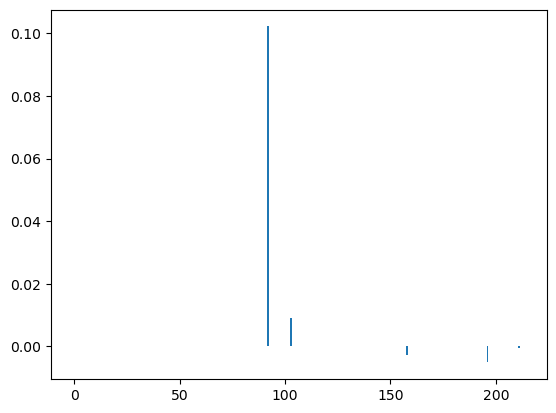

In [59]:
plt.bar([i for i in range(len(importance))], importance)
plt.show()

In [68]:
model_1 = sm.OLS(y_train.values.ravel(), X_train)
#y_train.values.reshape(-1,1)




In [69]:
results = model_1.fit_regularized() 
# lasso

In [70]:
results_1 = model_1.fit()
#linear

In [71]:
results.params

14-3-3_beta              -0.146185
14-3-3_epsilon_Caution   -0.182285
14-3-3_zeta              -0.028539
4E-BP1                    0.043111
4E-BP1_pS65               0.053460
                            ...   
XRCC1_Caution            -0.068783
YAP_Caution               0.019351
YAP_pS127_Caution        -0.003377
YB-1                      0.008677
YB-1_pS102               -0.042972
Length: 214, dtype: float64

In [72]:
y_pred = results.predict(X_test)

In [73]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.30884679098840667

In [74]:
r2_score(y_test, y_pred)


-0.8393308386000029

In [75]:
results_1.params

14-3-3_beta              -0.204648
14-3-3_epsilon_Caution   -0.114441
14-3-3_zeta               0.008910
4E-BP1                    0.040939
4E-BP1_pS65               0.055483
                            ...   
XRCC1_Caution            -0.075685
YAP_Caution               0.047121
YAP_pS127_Caution        -0.023365
YB-1                      0.051320
YB-1_pS102               -0.063936
Length: 214, dtype: float64

In [76]:
print(results_1.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.696
Method:                 Least Squares   F-statistic:                              4.311
Date:                Fri, 16 Dec 2022   Prob (F-statistic):                    4.53e-14
Time:                        23:15:29   Log-Likelihood:                          267.56
No. Observations:                 310   AIC:                                     -107.1
Df Residuals:                      96   BIC:                                      692.5
Df Model:                         214                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [77]:
print(results_1.tvalues)


14-3-3_beta              -1.137278
14-3-3_epsilon_Caution   -0.786510
14-3-3_zeta               0.129882
4E-BP1                    0.495049
4E-BP1_pS65               0.673017
                            ...   
XRCC1_Caution            -0.786366
YAP_Caution               0.562512
YAP_pS127_Caution        -0.555080
YB-1                      0.566250
YB-1_pS102               -0.815125
Length: 214, dtype: float64


In [78]:
#catboost
import os
import catboost
from catboost import *

In [80]:
from catboost import cv
from catboost.utils import create_cd, eval_metric
from catboost import CatBoostRegressor

In [81]:
X = comb_data_2.drop("CCLE_Name", axis = 1)
y = comb_data_model["GATA3 (2625)"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 14)


In [83]:
train_pool = Pool(X_train,
                  label = y_train.values)

test_pool = Pool(X_test, 
                 label = y_test.values)

In [84]:
model_2 = CatBoostRegressor(objective = "RMSE")

In [85]:
model_2.fit(train_pool, use_best_model = True, plot = True, verbose = 500)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.034026
0:	learn: 0.2176813	total: 477ms	remaining: 7m 56s
500:	learn: 0.0182888	total: 42.6s	remaining: 42.4s
999:	learn: 0.0014539	total: 1m 24s	remaining: 0us


In [86]:
y_pred = model_2.predict(test_pool)


In [87]:
r2_score(y_test, y_pred)


0.24249463429306473

In [88]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.1982010832661929

In [89]:
model_2.get_feature_importance(prettified = True)


,Feature Id,Importances
0,GATA3,18.499615
1,p27,2.074307
2,Paxillin_Caution,1.941149
3,GSK3-alpha-beta,1.654524
4,ERK2_Caution,1.616277
...,...,...
209,Raptor,0.055773
210,ACVRL1_Caution,0.053429
211,eIF4E,0.043713
212,PRDX1,0.022092


In [90]:
#cross validatiion
cv_2 = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = 14)


In [91]:
params = {}

params['loss_function'] = 'RMSE'
params['iterations'] = 80
params['custom_loss'] = 'R2'
params['random_seed'] = 14

In [92]:
cv_data = cv(
    params = params,
    pool = train_pool, 
    verbose = False, 
    plot = True,
    folds = cv_2
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/100]

bestTest = 0.1778847262
bestIteration = 79

Training on fold [1/100]

bestTest = 0.2505943621
bestIteration = 79

Training on fold [2/100]

bestTest = 0.1263789278
bestIteration = 71

Training on fold [3/100]

bestTest = 0.2578016736
bestIteration = 78

Training on fold [4/100]

bestTest = 0.2593809929
bestIteration = 79

Training on fold [5/100]

bestTest = 0.2561001435
bestIteration = 79

Training on fold [6/100]

bestTest = 0.1283120956
bestIteration = 79

Training on fold [7/100]

bestTest = 0.1626549006
bestIteration = 75

Training on fold [8/100]

bestTest = 0.2034021048
bestIteration = 79

Training on fold [9/100]

bestTest = 0.1727473781
bestIteration = 79

Training on fold [10/100]

bestTest = 0.1934009379
bestIteration = 79

Training on fold [11/100]

bestTest = 0.2618850939
bestIteration = 79

Training on fold [12/100]

bestTest = 0.184688722
bestIteration = 79

Training on fold [13/100]

bestTest = 0.1862843989
bestIteration = 79

Training on fold 

In [93]:
cv_data.head()

,iterations,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std,test-R2-mean,test-R2-std,train-R2-mean,train-R2-std
0,0,0.323331,0.054944,0.327279,0.005977,-1.387967,0.376958,-1.229835,0.031742
1,1,0.319468,0.055022,0.322832,0.005910,-1.328282,0.359584,-1.169643,0.030893
2,2,0.315804,0.055124,0.318557,0.005838,-1.272210,0.342691,-1.112555,0.029587
3,3,0.311663,0.055060,0.313756,0.005728,-1.210410,0.327286,-1.049354,0.028556
4,4,0.307351,0.054853,0.308928,0.005627,-1.148169,0.317173,-0.986764,0.027293


In [94]:
best_value = np.min(cv_data['test-RMSE-mean'])
best_iter = np.argmin(cv_data['test-RMSE-mean'])

print('Best validation RMSE, not stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-RMSE-std'][best_iter],
    best_iter)
)

Best validation RMSE, not stratified: 0.2022±0.0406 on step 79


In [95]:
best_value = np.max(cv_data['train-R2-mean'])
best_iter = np.argmax(cv_data['train-R2-mean'])

print('Best train R2, not stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['train-R2-std'][best_iter],
    best_iter)
)

Best train R2, not stratified: 0.4778±0.0161 on step 79


In [96]:
model_3 = CatBoostRegressor(objective = "RMSE", 
                            iterations = 79, 
                            random_seed = 14
)

In [97]:
model_3.fit(train_pool, use_best_model = True, plot = True, verbose = 500)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.267944
0:	learn: 0.2063857	total: 108ms	remaining: 8.39s
78:	learn: 0.0090568	total: 6.86s	remaining: 0us


In [98]:
y_pred = model_3.predict(test_pool)


In [99]:
r2_score(y_test, y_pred)

0.21011436788612914

In [100]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.20239290040628607

In [101]:
model_3.get_feature_importance(prettified = True)


,Feature Id,Importances
0,GATA3,19.751130
1,Paxillin_Caution,3.036508
2,N-Ras,2.371392
3,YB-1_pS102,1.942207
4,c-Kit,1.817809
...,...,...
209,Src_pY527,0.000000
210,STAT3_Caution,0.000000
211,Transglutaminase,0.000000
212,VAV1_Caution,0.000000


In [102]:
#other genes 
X = comb_data_2.drop("CCLE_Name", axis = 1)
y = comb_data_model["ZNF148 (7707)"]


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 14)


In [104]:
train_pool = Pool(X_train,
                  label = y_train.values)

test_pool = Pool(X_test, 
                 label = y_test.values)

In [105]:
model_2 = CatBoostRegressor(objective = "RMSE")

In [106]:
model_2.fit(train_pool, use_best_model = True, plot = True, verbose = 500)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.034026
0:	learn: 0.0481156	total: 114ms	remaining: 1m 54s
500:	learn: 0.0041228	total: 43.3s	remaining: 43.1s
999:	learn: 0.0002995	total: 1m 24s	remaining: 0us


In [107]:
y_pred = model_2.predict(test_pool)

In [108]:
r2_score(y_test, y_pred)

-0.08712941161093957

In [109]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.05685430432957295

In [110]:
model_2.get_feature_importance(prettified = True)


,Feature Id,Importances
0,p53_Caution,4.829560
1,4E-BP1,3.326131
2,eIF4G_Caution,3.176075
3,c-Jun_pS73,3.064318
4,ACC_pS79,2.552707
...,...,...
209,p27_pT157_Caution,0.022024
210,Acetyl-a-Tubulin (Lys40)_Caution,0.020277
211,INPP4B,0.017289
212,C-Raf(MP05-739),0.010129


In [111]:
X = comb_data_2.drop("CCLE_Name", axis = 1)
y = comb_data_model["TUBB (203068)"]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 14)


In [113]:
train_pool = Pool(X_train,
                  label = y_train.values)

test_pool = Pool(X_test, 
                 label = y_test.values)

In [114]:
model_2 = CatBoostRegressor(objective = "RMSE")


In [115]:
model_2.fit(train_pool, use_best_model = True, plot = True, verbose = 500)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.034026
0:	learn: 0.0813712	total: 136ms	remaining: 2m 16s
500:	learn: 0.0058063	total: 47.8s	remaining: 47.6s
999:	learn: 0.0004145	total: 1m 36s	remaining: 0us


In [116]:
y_pred = model_2.predict(test_pool)

In [117]:
r2_score(y_test, y_pred)


-0.03873145358955621

In [118]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.05915217430422618

In [119]:
model_2.get_feature_importance(prettified = True)


,Feature Id,Importances
0,p90RSK_Caution,7.222004
1,RSK1-2-3_Caution,4.612351
2,p90RSK_pT359_S363_Caution,4.473838
3,G6PD,3.718970
4,Notch1,3.676503
...,...,...
209,VAV1_Caution,0.017012
210,14-3-3_beta,0.015597
211,FRA1_Caution,0.008323
212,p62 Lck ligand_Caution,0.007043


In [120]:
#export
comb_data_2


,CCLE_Name,14-3-3_beta,14-3-3_epsilon_Caution,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,A-Raf_pS299_Caution,...,Tuberin_pT1462,VAV1_Caution,VEGFR2,VHL_Caution,XBP1_Caution,XRCC1_Caution,YAP_Caution,YAP_pS127_Caution,YB-1,YB-1_pS102
0,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.006628,0.026889,-0.114301,0.555592,0.300402,1.236959,-0.005440,-0.805627,0.002444,...,0.142181,6.394272,-1.083843,-1.210395,0.057738,-0.049683,-1.148816,-2.535212,-0.218127,0.888256
1,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.233930,-0.212656,0.032612,0.888113,0.307180,0.973485,0.437776,-0.282679,-0.321678,...,-0.463847,5.833021,-1.794523,-2.140060,0.241007,-0.105067,-1.454239,-3.022894,-0.000595,0.070327
2,LS513_LARGE_INTESTINE,0.116900,-0.081918,0.148502,-0.238036,-0.647017,-1.587667,-0.361270,-0.658063,-0.064598,...,-0.304282,0.040134,-0.046261,1.344098,0.287040,-0.049110,0.020065,0.180071,0.028785,0.009008
3,C2BBE1_LARGE_INTESTINE,0.142739,-0.012339,-0.526438,0.370901,0.087615,0.612442,-0.186115,0.032598,-0.304864,...,-0.325919,0.202650,1.155208,0.515055,-0.213274,-0.061394,0.870072,0.954783,-0.154237,0.252364
4,253J_URINARY_TRACT,-0.092114,-0.136659,-0.586332,0.421155,0.213949,-0.091469,0.359246,0.757307,0.369659,...,0.128657,-0.199293,0.189554,0.044669,0.461884,-0.020861,-0.027955,0.126444,0.454610,-0.010648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,NCIH292_LUNG,0.252412,-0.068051,0.037397,-0.803382,-0.616463,-1.305847,-0.450403,0.425464,-0.413703,...,-0.182437,-0.311633,1.173552,3.378971,-0.009567,-0.291652,0.382418,0.806994,-0.058253,-0.166783
440,OVCAR5_OVARY,-0.207196,-0.021296,0.032612,-0.526577,-0.461863,-0.149978,0.062437,-0.050168,0.231225,...,0.062589,0.195428,1.878884,1.658521,-0.244214,0.024529,0.389419,0.537548,0.607075,0.191105
441,WM2664_SKIN,-0.055814,0.287564,-0.130938,0.442206,0.781502,0.866074,0.213636,0.360800,-0.290984,...,0.188050,-0.209088,-1.297608,-1.640294,-0.108183,0.361956,0.190868,-0.219946,-0.169345,0.118103
442,8305C_THYROID,0.106198,0.084572,0.095978,0.476244,0.092959,0.183082,0.177638,0.349168,0.737673,...,0.121915,-0.001911,0.414701,-1.272706,0.231006,0.052144,0.477959,0.551769,0.154497,-0.160825


In [121]:
comb_data_model


,GATA3 (2625),ZNF148 (7707),TUBB (203068),CCLE_Name
0,0.008663,0.005573,0.999997,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
1,0.024312,0.017640,0.999966,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
2,0.059738,0.004905,0.575186,LS513_LARGE_INTESTINE
3,0.077281,0.143036,0.985983,C2BBE1_LARGE_INTESTINE
4,0.592221,0.000823,0.988119,253J_URINARY_TRACT
...,...,...,...,...
494,0.123055,0.000180,0.985893,NCIH292_LUNG
500,0.197414,0.027961,0.999723,OVCAR5_OVARY
513,0.397848,0.001271,0.962232,WM2664_SKIN
525,0.175224,0.019653,0.985449,8305C_THYROID


In [123]:
comb_data_2.to_csv("Comb_1.csv", index = False)


In [124]:
comb_data_model.to_csv("Comb_2.csv", index = False)
